In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
from scipy.special import binom
import random

# 1. Check probability 
N = 50 (total population)  
M = 20 (captured already)  
t = 12 (total captured this time)  
* Check (by simulation) that probability of m recaptured out of t is hypergeometrical

$$P(m|M,N) = \frac{\binom{M}{m}\binom{N-M}{t-m}}{\binom{N}{t}}$$  
*Probability of **m** recaptured given population size **N** and **M** previously captured*
$$\binom{n}{k} \equiv \frac{n!}{k!(n-k)!}$$

* Histogram of simulated vs theoretical

In [83]:
N = 50
M = 20
t = 12
size=15
rv = hypergeom(N, M, t)

In [84]:
rv.pmf(np.arange(size))

array([7.12466833e-04, 8.99958105e-03, 4.70228110e-02, 1.34350889e-01,
       2.33587340e-01, 2.59992866e-01, 1.89578131e-01, 9.09975030e-02,
       2.84367197e-02, 5.61712982e-03, 6.62018871e-04, 4.15058853e-05,
       1.03764713e-06, 0.00000000e+00, 0.00000000e+00])

In [78]:
population = M*[True] + (N-M)*[False]

In [79]:
samples = [np.sum(random.sample(population, t)) for i in range(10000)]

In [87]:
hypergeom.pmf(0, N, M, t)

0.0007124668334405122

In [108]:
def likelihood(population_size, captured_all, captured_now, recaptured_now):
    return np.nan_to_num(hypergeom.pmf(recaptured_now, population_size, captured_all, captured_now))


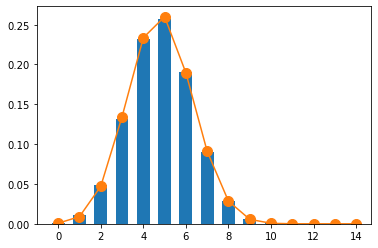

In [90]:
plt.hist(samples, bins=range(size), density=True, align="left", rwidth=0.6)
plt.plot(likelihood(N, M, t, range(size)), ".-", markersize=20)
plt.show()

# 2. 

In [94]:
true_population = M*[True] + (N-M)*[False]

In [122]:
%matplotlib widget

0 50 50
1 49 98
6 54 146
10 52 188
11 55 232
16 60 276
17 56 315
20 50 345
18 56 383
14 43 412


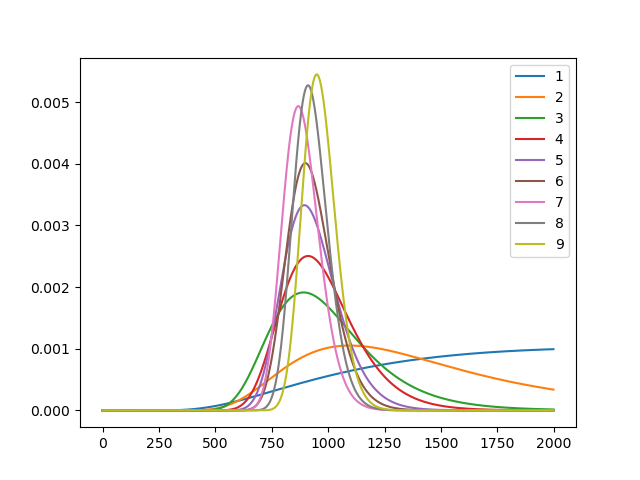

In [215]:
plt.figure()
N = 1000
M = [0]
space = np.arange(2000)
prior = np.ones_like(space)/space.shape[0]
estimation = [2*[np.mean(prior)]]
recaptured = []
for i in range(10):
    true_population = M[-1]*[True] + (N-M[-1])*[False]
    t = random.randint(40, 60)
    samples = random.sample(true_population, t)
    m = np.sum(samples)
    lkhood = likelihood(space, M[-1], t, m)
    prior = lkhood * prior / np.sum(lkhood * prior)    
    M.append(M[-1] + t - m)
    estimation.append([space[np.argmax(prior)], (space * prior).sum() / prior.sum()])
    recaptured.append(m)
    print(m, t, M[-1])
    if i == 0:
        continue
    # print("Estimation:", space[np.argmax(prior)])
    # estimation.append(space[np.argmax(prior)])
    plt.plot(space, prior, label=str(i))
estimation = np.array(estimation)
plt.legend()
plt.show()

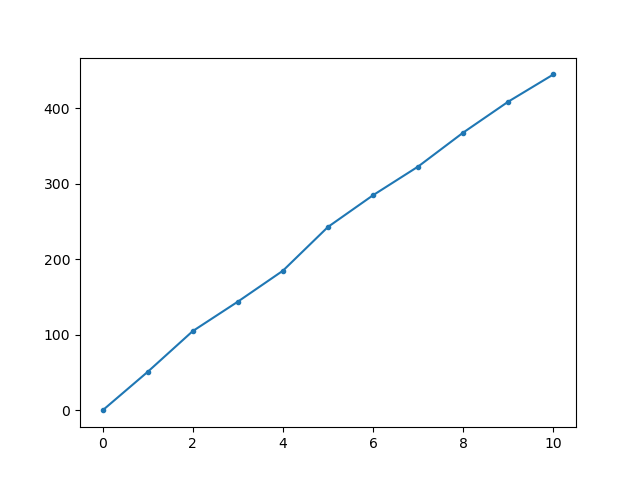

In [228]:
plt.figure()
plt.plot(range(len(M)), M, ".-")

In [210]:
np.diff(M)

array([111,  88,  71,  39,  40,  59,  50,  55,  53,  50])

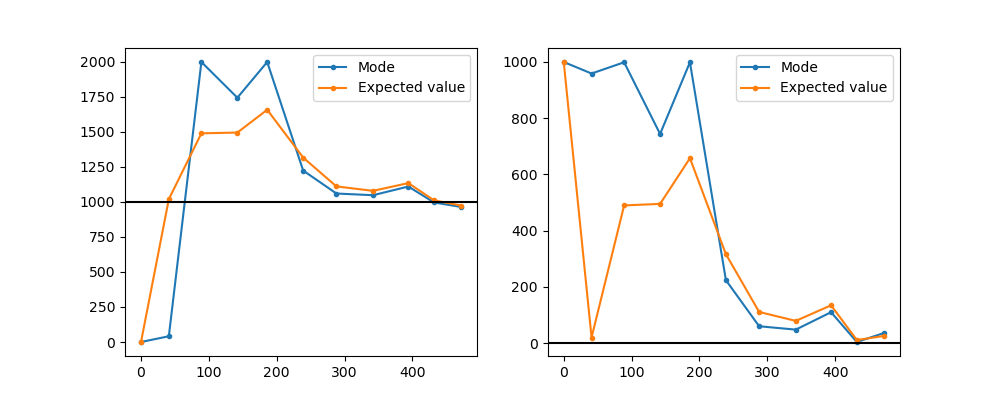

In [225]:
plt.figure(figsize=(10,4))
# plt.plot(M, np.abs(np.array(estimation)-N), ".-")
plt.subplot(121)
plt.plot(M, estimation[:, 0], ".-", label="Mode")
plt.plot(M, estimation[:, 1], ".-", label="Expected value")
plt.legend()
plt.axhline(N, c="k")
plt.subplot(122)
plt.plot(M, np.abs(np.array(estimation[:,0])-N), ".-", label="Mode")
plt.plot(M, np.abs(np.array(estimation[:,1])-N), ".-", label="Expected value")
plt.legend()
plt.axhline(0, c="k")

# Lincoln

In [ ]:
plt.figure()
N = 1000
M = [0]
space = np.arange(2000)
prior = np.ones_like(space)/space.shape[0]
estimation = [2*[np.mean(prior)]]
recaptured = []
for i in range(10):
    true_population = M[-1]*[True] + (N-M[-1])*[False]
    t = random.randint(40, 60)
    samples = random.sample(true_population, t)
    m = np.sum(samples)
    lkhood = likelihood(space, M[-1], t, m)
    prior = lkhood * prior / np.sum(lkhood * prior)
    M.append(M[-1] + t - m)
    estimation.append(
        [space[np.argmax(prior)], (space * prior).sum() / prior.sum()])
    recaptured.append(m)
    print(m, t, M[-1])
    if i == 0:
        continue
    # print("Estimation:", space[np.argmax(prior)])
    # estimation.append(space[np.argmax(prior)])
    plt.plot(space, prior, label=str(i))
estimation = np.array(estimation)
plt.legend()
plt.show()
